In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
path= 'ex1data2.txt'
data = pd.read_csv(path,header = None,names=['大小','卧室数目','价格'])

In [33]:
data.head()

,大小,卧室数目,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [34]:
data = (data - data.mean())/data.std()


In [35]:
data.insert(0,'辅助',1)

In [36]:
data

,辅助,大小,卧室数目,价格
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389
5,1,-0.019732,1.090417,-0.323998
6,1,-0.587240,-0.223675,-0.204036
7,1,-0.721881,-0.223675,-1.130948
8,1,-0.781023,-0.223675,-1.026973
9,1,-0.637573,-0.223675,-0.783051


In [37]:
X = data.iloc[:,0:3]
X.head()

,辅助,大小,卧室数目
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [38]:
Y = data.iloc[:,-1]

In [39]:
Y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: 价格, dtype: float64

In [40]:
X=np.matrix(X)
Y=np.matrix(Y)

In [41]:
X.shape

(47, 3)

In [42]:
Y.shape

(1, 47)

In [43]:
Y=Y.T

In [44]:
theta = np.array([0,0,0])
theta = np.matrix(theta)

In [45]:
theta.shape

(1, 3)

In [46]:
theta = theta.T

In [99]:
def costJ(theta,X,Y):
    temp = np.power((X*theta-Y),2)
    return np.sum(temp)/(2*len(X))

In [119]:
def GD(a,theta,X,Y,nums,iters):
    cost = np.zeros(iters)
    for j in range(iters):
        temp = np.zeros(nums)
        temp = np.matrix(temp)
        temp = temp.T
        for i in range(nums):
            temp[i] = np.sum(np.multiply(X*theta-Y,X[:,i]))/len(X)
        theta = theta-a*temp
        cost[j] = costJ(theta,X,Y)
    return theta,cost

In [120]:
costJ(theta,X,Y)

0.4893617021276595

In [121]:
iters = 1000
a=0.1
target,cost=GD(a,theta,X,Y,3,iters)

In [122]:
target

matrix([[-6.27748444e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

In [123]:
costJ(target,X,Y)

0.13068648053904192

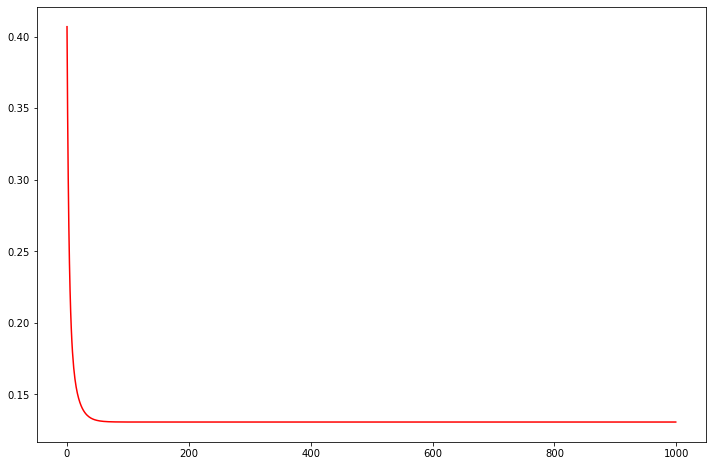

In [124]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost,'r')
plt.show()